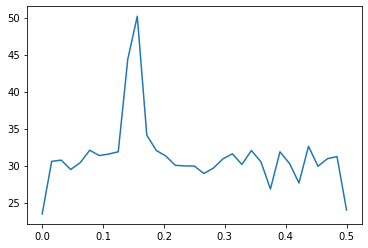

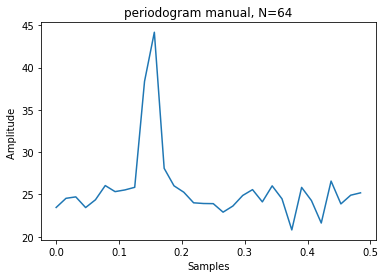

(0.8579093827275327, 1.7756350530680285e-10) (0.8579093827275327, 1.7756350530680285e-10)
SpearmanrResult(correlation=0.7901069518716578, pvalue=4.550477587752049e-08) 4.550477587752049e-08


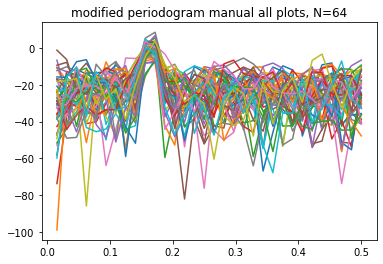

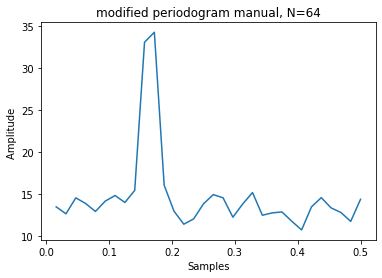

In [20]:
from __future__ import division
import numpy as np
import scipy as sp
import librosa
import matplotlib.pyplot as plt
import scipy.stats 
import pywt

from scipy.fft import fft, ifft

N=64

#parameters for thes signal
n=np.linspace(1,N-1,N-1)
x=np.zeros(N)
noise=np.random.normal(size=N) 
ph1=np.random.uniform(low=0,high=2*np.pi)
ph2=np.random.uniform(low=0,high=2*np.pi)

#the signal
#print(x.shape,len(n),noise.shape)
x[0]=0.1*np.cos(0.2*np.pi*0 + ph1) + np.sin(0.3*np.pi*0 + ph2)
x[1:N]=0.1*np.cos(0.2*np.pi*n + ph1) + np.sin(0.3*np.pi*n + ph2) + noise[1:N]




#periodogram

yav=0
yav2=0
iterations=50
for i in range(iterations):
    #periodogram maual method
    n=np.linspace(1,N-1,N-1)
    x=np.zeros(N)
    noise=np.random.normal(size=N) 
    ph1=np.random.uniform(low=0,high=2*np.pi)
    ph2=np.random.uniform(low=0,high=2*np.pi)
    x[0]=0.1*np.cos(0.2*np.pi*0 + ph1) + np.sin(0.3*np.pi*0 + ph2)
    x[1:N]=0.1*np.cos(0.2*np.pi*n + ph1) + np.sin(0.3*np.pi*n + ph2) + noise[1:N]
    y=fft(x)
    yi=np.abs(y)**2/len(y)
    yi=yi/np.pi
    yav+=yi
    #periodogram python library method    
    wnd_orth=sp.signal.get_window('boxcar',N)
    f_p, Pxx_den_p = sp.signal.welch(x,window=wnd_orth,nperseg=len(wnd_orth),noverlap=0,detrend=False)#
    Pxx_den_p=Pxx_den_p/np.pi
    yav2+=Pxx_den_p
#print(Pxx_den_p.shape)

yav/iterations

yav2/iterations

plt.plot(f_p,20*np.log10(yav2))
plt.show()

#plt.plot()
plt.plot(f_p[:int(N/2)],20*np.log10(yav[0:int((len(yav)/2))]))
plt.title('periodogram manual, N='+str(N))
plt.ylabel('Amplitude ')
plt.xlabel('Samples')
plt.show()
##modified periodogram

#calculating all overlaps
wnd=np.hamming(N)
p=[]
cor=[]
for i in range(0,len(wnd)):
    f_w, Pxx_den_w = sp.signal.welch(x,window=wnd,nperseg=len(wnd),noverlap=i,detrend=False)#len(wnd)/(N**2)
    Pxx_den_w=Pxx_den_w/np.pi
    
    sr=sp.stats.spearmanr(Pxx_den_w,Pxx_den_p)
    cor.append(sr[0])
    #calculating the best overlap
    Pxx_den_w=Pxx_den_w-sp.signal.resample(Pxx_den_p,len(Pxx_den_w))
    p.append(np.nanmean(Pxx_den_w,))
#print(p.index(min(p)),min(p))
#print(cor.index(max(cor)),max(cor))

#use the overlap I think of as best
f_w, Pxx_den_w = sp.signal.welch(x,window=wnd,nperseg=len(wnd),noverlap=p.index(min(p)),detrend=False)#len(wnd)/(N**2)
Pxx_den_w=Pxx_den_w/np.pi
#print(Pxx_den_w.shape)
###plot it with another random one
#plt.plot(f_w[1:N],20*np.log10(Pxx_den_w[1:N]))
#plt.show()
pr=sp.stats.pearsonr(Pxx_den_w,Pxx_den_p)
sr=sp.stats.spearmanr(Pxx_den_w,Pxx_den_p)
#print(pr)
#print(sr[1])
f_w, Pxx_den_w = sp.signal.welch(x,window=wnd,nperseg=len(wnd),noverlap=cor.index(min(cor)),detrend=False)#len(wnd)/(N**2)
Pxx_den_w=Pxx_den_w/np.pi
#print(Pxx_den_w.shape)
#plt.plot(f_w[1:N],20*np.log10(Pxx_den_w[1:N]))
#plt.show()
nc=np.corrcoef(Pxx_den_w,Pxx_den_p)

pr=sp.stats.pearsonr(Pxx_den_w,Pxx_den_p)
sr=sp.stats.spearmanr(Pxx_den_w,Pxx_den_p)
print(pr,pr)
print(sr,sr[1])

wnd=np.hamming(N)
ywav=0
iterations=50
for i in range(iterations):
    n=np.linspace(1,N-1,N-1)
    x=np.zeros(N)
    noise=np.random.normal(size=N) 
    ph1=np.random.uniform(low=0,high=2*np.pi)
    ph2=np.random.uniform(low=0,high=2*np.pi)

#the signal
#print(x.shape,len(n),noise.shape)
    x[0]=0.1*np.cos(0.2*np.pi*0 + ph1) + np.sin(0.3*np.pi*0 + ph2)
    x[1:N]=0.1*np.cos(0.2*np.pi*n + ph1) + np.sin(0.3*np.pi*n + ph2) + noise[1:N]

    U=sum(np.abs(wnd)**2)/len(wnd)
    xh=wnd*x
    yh=fft(xh)
    yh=yh/np.pi
    yw=np.abs(yh)**2/(len(yh)*U)
    plt.plot(f_w[1:N],20*np.log10(yw[0:int((len(yw)/2))]))
    ywav+=yw
    ywav/50
plt.title('modified periodogram manual all plots, N='+str(N))
plt.show()
plt.plot(f_w[1:N],20*np.log10(ywav[0:int((len(ywav)/2))]))
plt.title('modified periodogram manual, N='+str(N))
plt.ylabel('Amplitude ')
plt.xlabel('Samples')
plt.show()


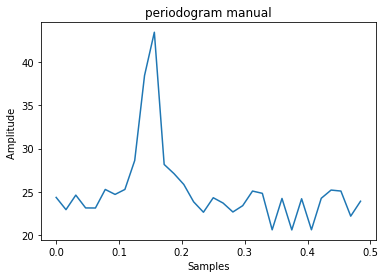

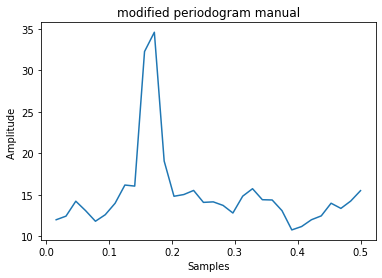

In [4]:
N=64

#parameters for thes signal
n=np.linspace(1,N-1,N-1)
x=np.zeros(N)
noise=np.random.normal(size=N) 
ph1=np.random.uniform(low=0,high=2*np.pi)
ph2=np.random.uniform(low=0,high=2*np.pi)

#the signal
#print(x.shape,len(n),noise.shape)
x[0]=0.1*np.cos(0.2*np.pi*0 + ph1) + np.sin(0.3*np.pi*0 + ph2)
x[1:N]=0.1*np.cos(0.2*np.pi*n + ph1) + np.sin(0.3*np.pi*n + ph2) + noise[1:N]




#periodogram

yav=0
yav2=0
iterations=50
for i in range(iterations):
    #periodogram maual method
    n=np.linspace(1,N-1,N-1)
    x=np.zeros(N)
    noise=np.random.normal(size=N) 
    ph1=np.random.uniform(low=0,high=2*np.pi)
    ph2=np.random.uniform(low=0,high=2*np.pi)
    x[0]=0.1*np.cos(0.2*np.pi*0 + ph1) + np.sin(0.3*np.pi*0 + ph2)
    x[1:N]=0.1*np.cos(0.2*np.pi*n + ph1) + np.sin(0.3*np.pi*n + ph2) + noise[1:N]
    y=fft(x)
    yi=np.abs(y)**2/len(y)
    yi=yi/np.pi
    yav+=yi
    #periodogram python library method    
    wnd_orth=sp.signal.get_window('boxcar',N)
    f_p, Pxx_den_p = sp.signal.welch(x,window=wnd_orth,nperseg=len(wnd_orth),noverlap=0,detrend=False)#
    Pxx_den_p=Pxx_den_p/np.pi
    yav2+=Pxx_den_p
#print(Pxx_den_p.shape)

yav/iterations
plt.plot(f_p[:int(N/2)],20*np.log10(yav[0:int((len(yav)/2))]))
plt.title('periodogram manual')
plt.ylabel('Amplitude ')
plt.xlabel('Samples')
plt.show()
wnd=np.hamming(N)
ywav=0
iterations=50
for i in range(iterations):
    n=np.linspace(1,N-1,N-1)
    x=np.zeros(N)
    noise=np.random.normal(size=N) 
    ph1=np.random.uniform(low=0,high=2*np.pi)
    ph2=np.random.uniform(low=0,high=2*np.pi)

#the signal
#print(x.shape,len(n),noise.shape)
    x[0]=0.1*np.cos(0.2*np.pi*0 + ph1) + np.sin(0.3*np.pi*0 + ph2)
    x[1:N]=0.1*np.cos(0.2*np.pi*n + ph1) + np.sin(0.3*np.pi*n + ph2) + noise[1:N]

    U=sum(np.abs(wnd)**2)/len(wnd)
    xh=wnd*x
    yh=fft(xh)
    yh=yh/np.pi
    yw=np.abs(yh)**2/(len(yh)*U)
    ywav+=yw
f_w, Pxx_den_w = sp.signal.welch(x,window=wnd,nperseg=len(wnd),noverlap=i,detrend=False)#len(wnd)/(N**2)    
ywav/50
plt.plot(f_w[1:N],20*np.log10(ywav[0:int((len(ywav)/2))]))
plt.title('modified periodogram manual')
plt.ylabel('Amplitude ')
plt.xlabel('Samples')
plt.show()

In [19]:
#3.5st)question
X=np.array(([1,-0.1,0.2],[1,-0.3,0.5],[0,0.1,0.3],[5,-1,1]))
print(X)
#X=np.array(([1,0,4],[1,-2,-1],[0,1,-1],[-3,0,-1],[1,1,-1]))
#print(X
Rx=(-1/X.shape[0])*np.matmul(X.T,X)
eigenvalues,eigenvector=np.linalg.eig(Rx)
print(eigenvector[:,0])#print the eigenvector that is e
for i in range(0,X.shape[0]):
    print("a"+str(i)+" is:",np.matmul(X[i,:].T,eigenvector[:,0]))#print the values of a 

[[ 1.  -0.1  0.2]
 [ 1.  -0.3  0.5]
 [ 0.   0.1  0.3]
 [ 5.  -1.   1. ]]
[ 0.95994558 -0.19218595  0.20388487]
a0 is: 1.0199411511112924
a1 is: 1.1195438005589435
a2 is: 0.04194686459074634
a3 is: 5.19579873031797
